In [2]:
import pandas as pd

In [4]:
# 9.1 Line Plot

# A. Make a dataframe called foot using the "international_football_results.csv" file
#    Perform a few exploratory data analysis operations before working with the data set

# We'll use the .to_datetime method and .dt.year property to set the "year" column from a string to an integer

football = pd.read_csv('./international_football_results.csv')
# foot['year'] = pd.to_datetime(foot['date']).dt.year
football
football['year'] = pd.to_datetime(football['date']).dt.year
football


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876
...,...,...,...,...,...,...,...,...,...,...
39664,2018-07-06,Uruguay,France,0,2,FIFA World Cup,Nizhny Novgorod,Russia,True,2018
39665,2018-07-06,Brazil,Belgium,1,2,FIFA World Cup,Kazan,Russia,True,2018
39666,2018-07-07,Sweden,England,0,2,FIFA World Cup,Samara,Russia,True,2018
39667,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,2018


In [14]:
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


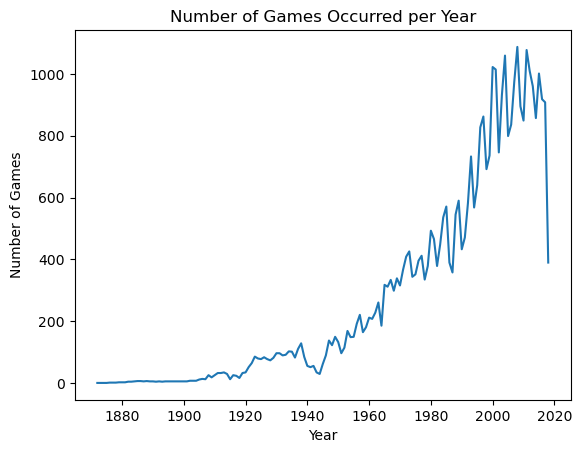

In [5]:
import matplotlib.pyplot as plt

# B. Charting the number of games occurred in each year
games_per_year = football['year'].value_counts().sort_index()

plt.plot(games_per_year.index, games_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Games Occurred per Year')
plt.show()

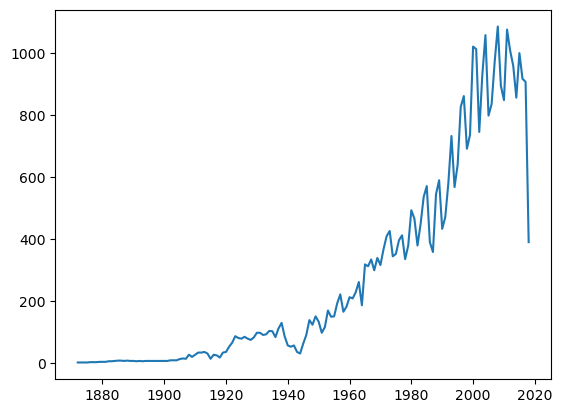

In [16]:
games_per_year = football['year'].value_counts().sort_index().plot()


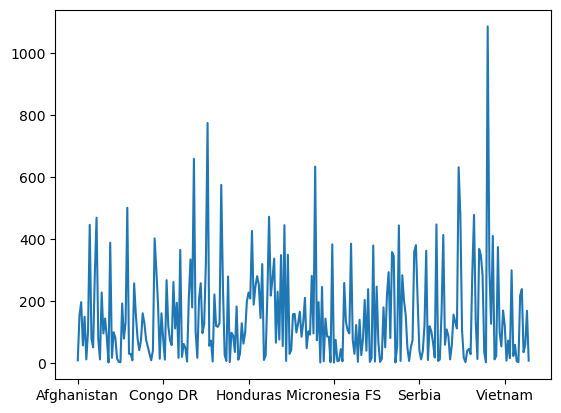

In [17]:
country_per_year = football['country'].value_counts().sort_index().plot()


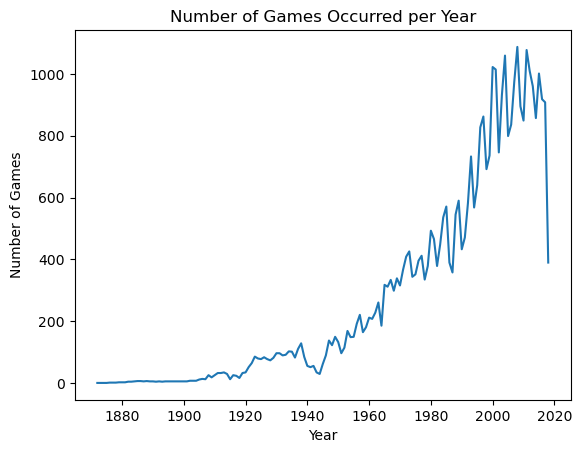

In [6]:
# The years are out of order! Fortunately, we can sort our column by its index with sort_index()

# B. Charting the number of games occurred in each year
games_per_year = football['year'].value_counts().sort_index()

games_per_year = games_per_year.sort_index()  # Sort the years in ascending order

plt.plot(games_per_year.index, games_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Games Occurred per Year')
plt.show()


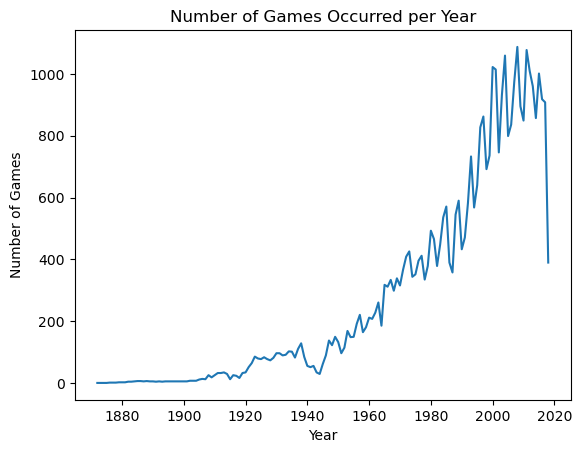

In [7]:
# Finally, we're ready to plot the change over time with .plot()
games_per_year = football['year'].value_counts().sort_index()

games_per_year = games_per_year.sort_index()  # Sort the years in ascending order

games_per_year.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.title('Number of Games Occurred per Year')
plt.show()


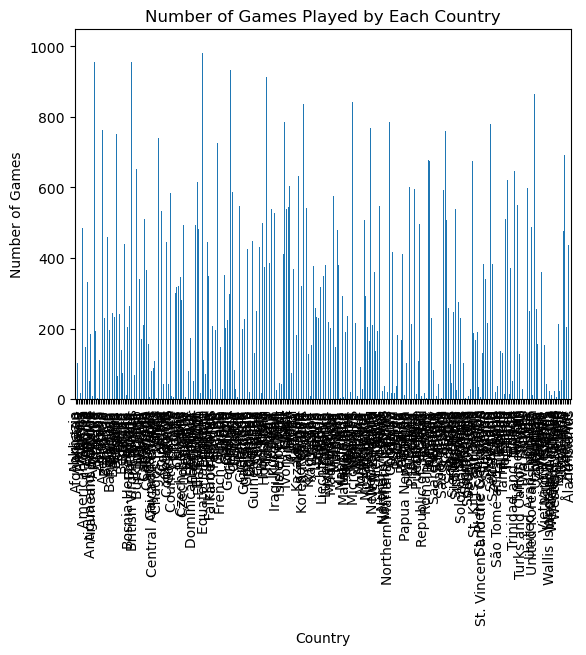

In [8]:
# 9.2 Bar Charts
# A. Let's see how many games each country played, represented as a bar chart
country_games = football['home_team'].value_counts() + football['away_team'].value_counts()

country_games.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Games')
plt.title('Number of Games Played by Each Country')
plt.show()

<Axes: >

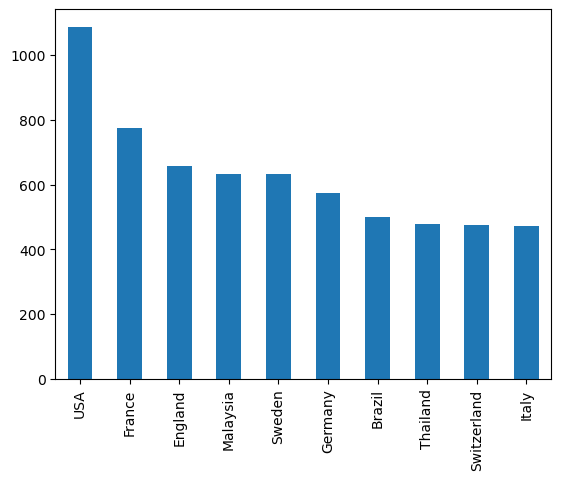

In [31]:
 football['country'].value_counts().head(10).plot(kind='bar')



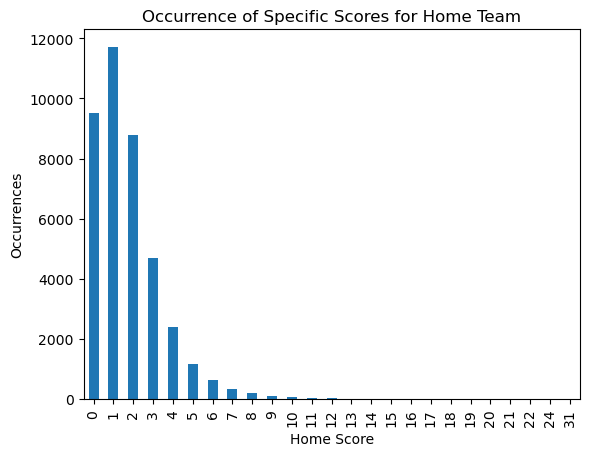

In [9]:
# B. Now let's plot the occurrence of specific scores for the home team
home_scores = football['home_score'].value_counts().sort_index()

home_scores.plot(kind='bar')
plt.xlabel('Home Score')
plt.ylabel('Occurrences')
plt.title('Occurrence of Specific Scores for Home Team')
plt.show()

<Axes: >

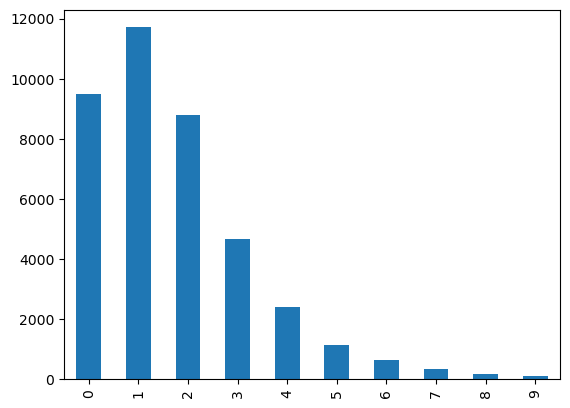

In [35]:
football['home_score'].value_counts().sort_index().head(10).plot(kind='bar')

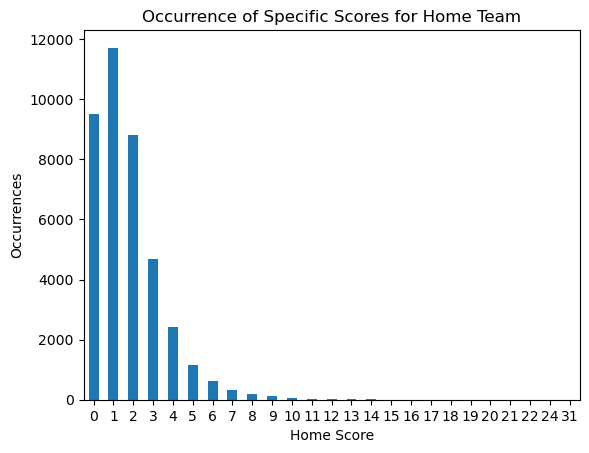

In [10]:
# C. Instead of sorting from highest to lowest value, let's sort the x axis in ascending order
home_scores = football['home_score'].value_counts().sort_index()

home_scores.plot(kind='bar')
plt.xlabel('Home Score')
plt.ylabel('Occurrences')
plt.title('Occurrence of Specific Scores for Home Team')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

<Axes: >

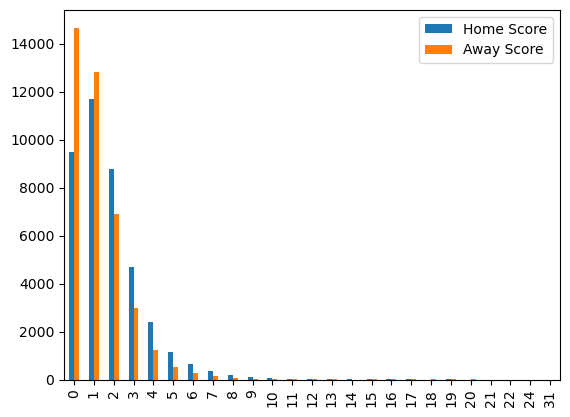

In [37]:
# BONUS: Compare the home_score and away_score value counts to analyze home field advantage
# You will need to use the .apply method to use value_counts on each column of a dataframe
# We will cover .apply in the next lesson, but you can google it to find out how to use it
home_score_counts = football['home_score'].value_counts()
away_score_counts = football['away_score'].value_counts()
value_counts_df = pd.DataFrame({'Home Score': home_score_counts, 'Away Score': away_score_counts})
value_counts_df = value_counts_df.sort_index()
value_counts_df.plot(kind='bar')


In [40]:
# 9.3 Histograms
# A. Let's start with a new dataset. Create a dataframe called choc from the './chocolate_ratrings.csv' file
#    Inspect the data using some exploratory data analysis methods
choc = pd.read_csv('./chocolate_ratings.csv')
choc

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


<Axes: ylabel='Frequency'>

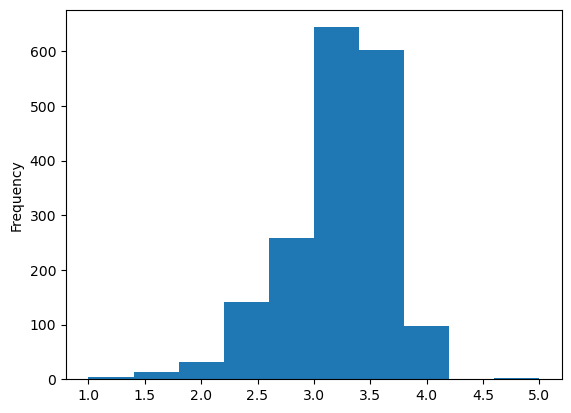

In [42]:
choc['Rating'].plot(kind='hist',bins=10)

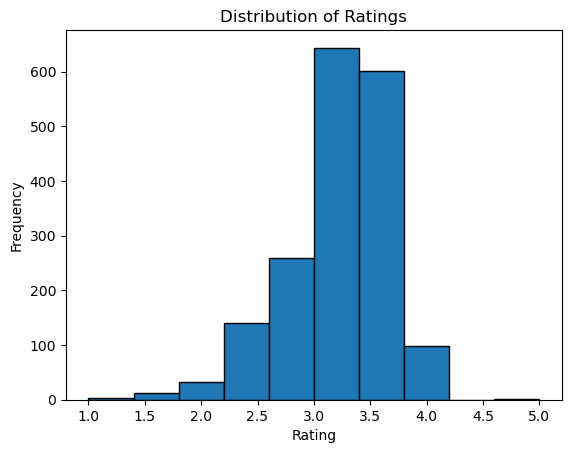

In [41]:
# B. Now, let's explore the distribution of ratings
#    i. Start by plotting the Rating column in a histogram
plt.hist(choc['Rating'], bins=10, edgecolor='black')

# Set the labels and title of the plot
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')

# Show the plot
plt.show()

In [ ]:
#    ii. Looking good! Let's see how granular we can get
#        Modify the number of bins to change how ranges are distributed


In [ ]:
#    iii. Now, let's add some descriptive labels to our chart


In [ ]:
# 9.4 Scatter Plots
# A. Is there a connection between Review Date and Rating? Plot them with a scatter plot

# Why is this graph not so helpful?

In [2]:
# B. Explore the avocado.csv dataset by creating a new DataFrame and conducting some EDA.
# Then scatter plot correlation between Total Volume and AveragePrice
import pandas as pd
avocado = pd.read_csv('./avocado.csv')
avocado


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


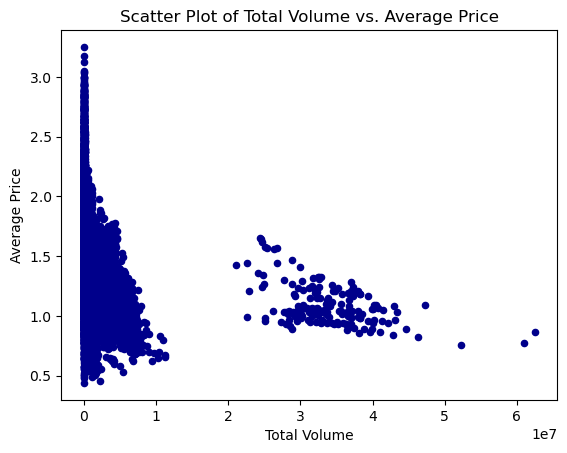

In [14]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the avocado dataset
avocado = pd.read_csv('./avocado.csv')

# Create a DataFrame with 'Total Volume' and 'AveragePrice' columns
df = avocado[['Total Volume', 'AveragePrice']]

# Create a scatter plot
ax = df.plot.scatter(x='Total Volume', y='AveragePrice', c='DarkBlue')

# Set the axis labels and title
ax.set_xlabel('Total Volume')
ax.set_ylabel('Average Price')
ax.set_title('Scatter Plot of Total Volume vs. Average Price')

# Show the plot
plt.show()



In [15]:


# Display the first few rows of the DataFrame
print(avocado.head())

# Check the dimensions of the DataFrame
print(avocado.shape)

# Get statistical summary of the numerical columns
print(avocado.describe())

# Check the data types of the columns
print(avocado.dtypes)

# Check for missing values
print(avocado.isnull().sum())




   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [ ]:
# 9.5 Visualizations to Hypotheses
# Create visualizations around any of the above datasets or our superstore datasets
# For at least one of the visualizations, attach a hypothesis or specific claim the chart supports
